# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Finding** 


## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob, os
%matplotlib inline

## Calibrate Camera

In [2]:
#Array with name of chessboard images
filename = []  
images = []


os.chdir("./camera_cal/")
for file in glob.glob("*.jpg"):
    filename.append(file)

num_images = 0
for name_img in filename:
    current_path = '../camera_cal/' + name_img
    #print(current_path)
    image = mpimg.imread(current_path)
    images.append(image)  
    num_images = num_images + 1
    
'''
#Plot chessboards images    
plt.figure(figsize=(24, 16))   
for i in range(num_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(images[i])     
    plt.axis('off')
'''

#Convert an image to grayscale
gray = []
for image in images:
    grayimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray.append(grayimg)
    
objpoints = [] #3D points in real world space
imgpoints = [] #2D points in image plane

objp = np.zeros((9*6,3) , np.float32)

objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) #x,y coordinates

for grayimg in gray:
    #Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(grayimg, (9,6), None)

    #collect the object points and image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)  
   

In [3]:
# Function that undistort a given image
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

## Read in an Image

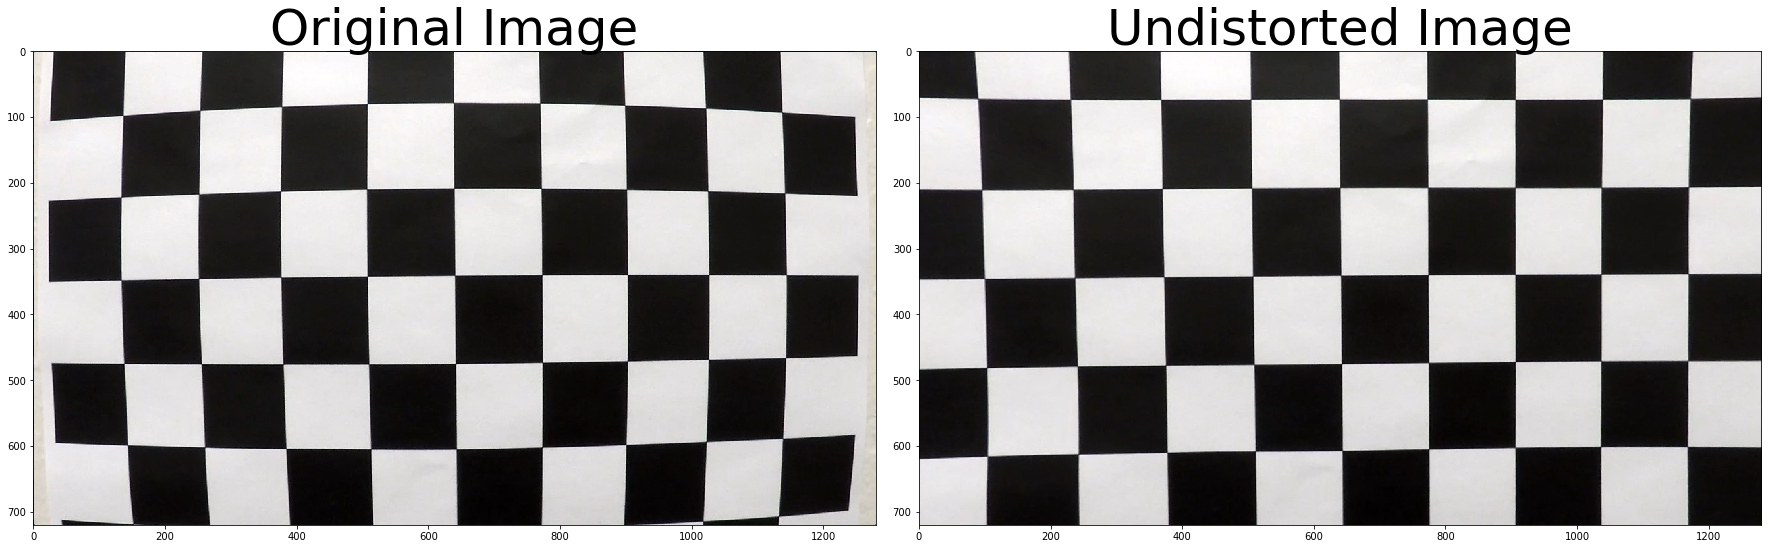

In [4]:
images = os.listdir("../output_images/")

#reading in an image
chess_image = mpimg.imread('../camera_cal/calibration1.jpg')

chess_image_undistorted = cal_undistort(chess_image, objpoints, imgpoints)


for img_file in images:
    mpimg.imsave('../output_images/chessboard.jpg', chess_image) 
    mpimg.imsave('../output_images/chessboard_und.jpg', chess_image_undistorted) 
    
    
    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(chess_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(chess_image_undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


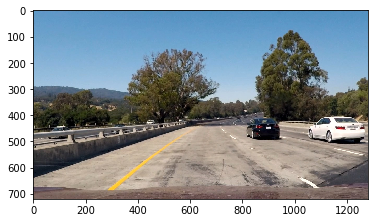

In [5]:
#reading in an image
sample_image = mpimg.imread('../test_images/test1.jpg')

#printing out some stats and plotting
print('This image is:', type(sample_image), 'with dimensions:', sample_image.shape)
plt.imshow(sample_image)  

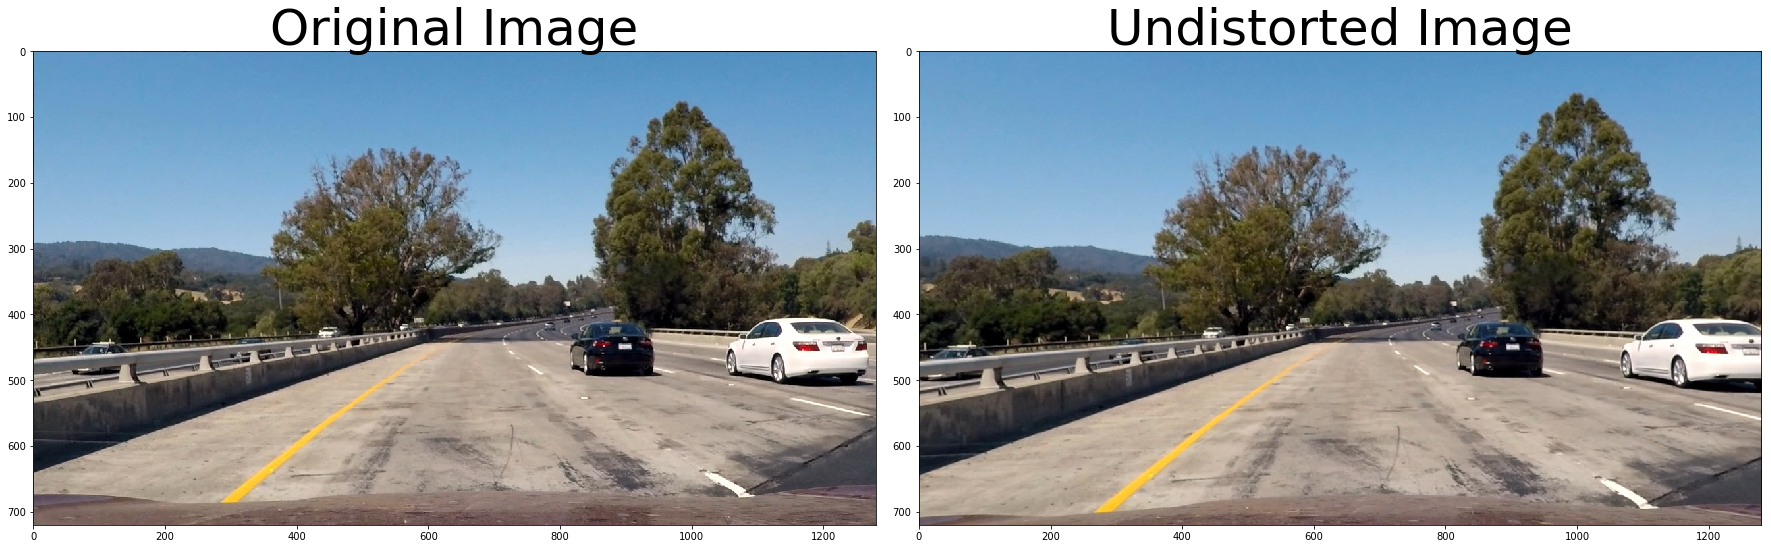

In [6]:
#Produces an undistorted image
undistorted = cal_undistort(sample_image, objpoints, imgpoints)


for img_file in images:
    mpimg.imsave('../output_images/undistorted.jpg', undistorted) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(sample_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Warped Image

In [7]:
'''
First we should define which are the points of the original image we have
to take into account
'''

'''
def warp(img, offset):

    #Define calibration box
    img_size = (img.shape[1], img.shape[0])
    
    
    # four source points
    src = np.float32(
         [
          [550, 450],
          [250, 650],
          [1100, 650],
          [750, 450]   
         ])

    dst = np.float32(
          [ 
          [offset, offset],    
          [offset, img_size[1]-offset],
          [img_size[0]-offset, img_size[1]-offset],                   
          [img_size[0]-offset, offset]                                              
          ])
       
    M = cv2.getPerspectiveTransform(src, dst)
    

    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped
'''

def warp(img, scr, dest):
    
    h,w = img.shape[:2]
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)

    return warped, M, Minv

h,w = undistorted.shape[:2]

# define source and destination points for transform
src = np.float32([(575,465),
                  (705,465), 
                  (258,685), 
                  (1050,685)])
dst = np.float32([(450,0),
                  (w-450,0),
                  (450,h),
                  (w-450,h)])

warped_img, M, Minv = warp(undistorted, src, dst)


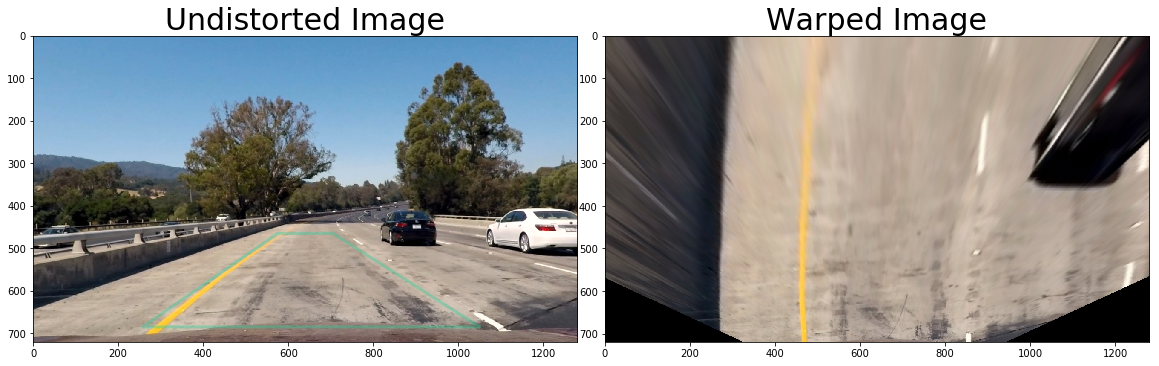

In [8]:
#Plot the image warped
offset = 0;
'''
#warped_img = warp(undistorted, offset)
f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.set_title('Source image')
ax1.imshow(undistorted)
ax2.set_title('Warped image')
ax2.imshow(warped_img)

'''

# Visualize unwarp
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(undistorted)
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
ax1.plot(x, y, color='#33cc99', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
ax1.set_ylim([h,0])
ax1.set_xlim([0,w])
ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(warped_img)
ax2.set_title('Warped Image', fontsize=30)

for img_file in images:
    mpimg.imsave('../output_images/warped.jpg', warped_img) 


## HLS 

##### Now it's time to apply color threshold to the image just warped 

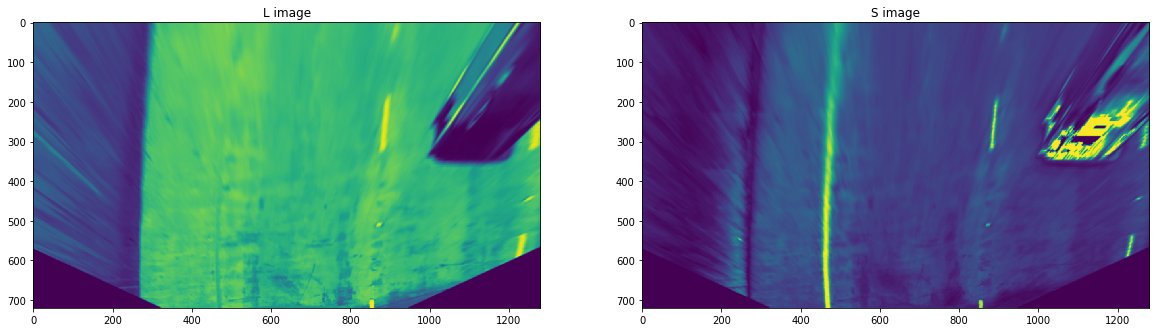

In [9]:

hls = cv2.cvtColor(warped_img, cv2.COLOR_RGB2HLS)

hls = cv2.GaussianBlur(hls,(5,5),0)

H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]


f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.set_title('L image')
ax1.imshow(L)
ax2.set_title('S image')
ax2.imshow(S)

for img_file in images:
    mpimg.imsave('../output_images/S.jpg', S) 
    mpimg.imsave('../output_images/L.jpg', L) 


##  HLS Threshold 

#### The main idea is to try different combinations of colors components applied to binary image

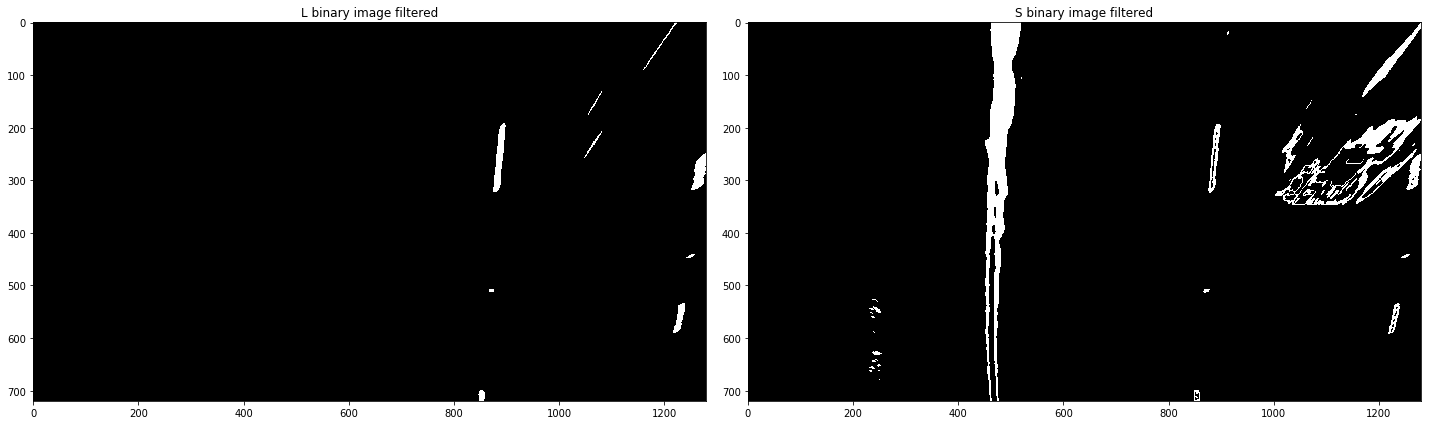

In [36]:
from matplotlib import cm

thresh_S = (100, 220)
S = S*(255/np.max(S))
binary_S = np.zeros_like(S)
binary_S[(S > thresh_S[0]) & (S <= thresh_S[1])] = 1

thresh_L = (220, 255)
L = L*(255/np.max(L))
binary_L = np.zeros_like(L)
binary_L[(L > thresh_L[0]) & (L <= thresh_L[1])] = 1


f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
f.tight_layout()

ax1.imshow(binary_L, cmap='gray')
ax1.set_title('L binary image filtered')


ax2.imshow(binary_S, cmap='gray')
ax2.set_title('S binary image filtered')

for img_file in images:
    mpimg.imsave('../output_images/S_binary.jpg', binary_S, cmap = cm.gray) 
    mpimg.imsave('../output_images/L_binary.jpg', binary_L, cmap = cm.gray)


## HSV

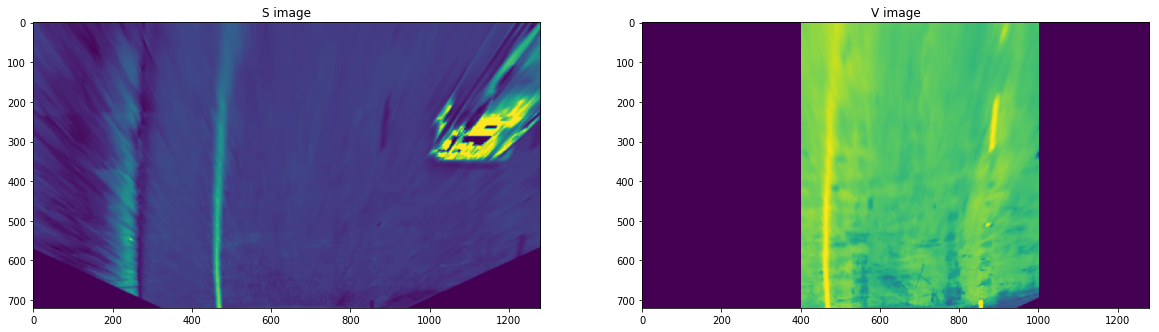

In [37]:
hsv = cv2.cvtColor(warped_img, cv2.COLOR_RGB2HSV)

hsv = cv2.GaussianBlur(hsv,(7,7),0)

H = hsv[:,:,0]
S = hsv[:,:,1]
V = hsv[:,:,2]


V[0 : 720, 0: 400] = 0

V[0 : 720, 1000: 1280] = 0

f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.set_title('S image')
ax1.imshow(S)
ax2.set_title('V image')
ax2.imshow(V)

for img_file in images:    
    mpimg.imsave('../output_images/V.jpg', V)

## HSV Threshold 

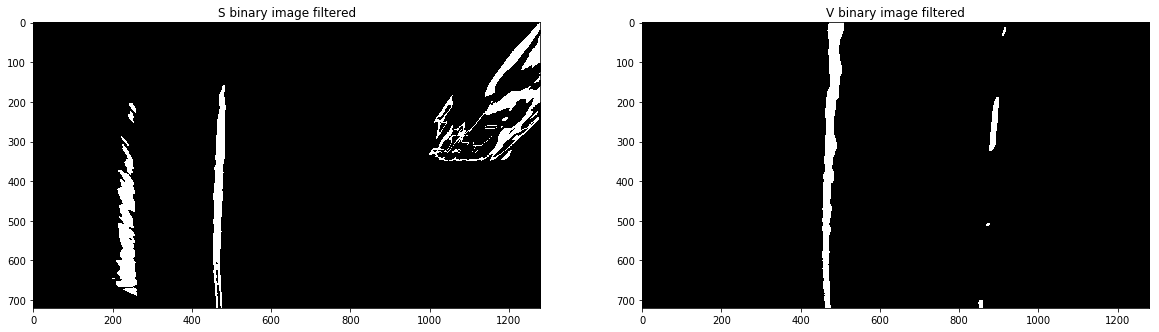

In [38]:
thresh_S = (90, 185)
S = S*(255/np.max(S))
binary_S = np.zeros_like(S)
binary_S[(S > thresh_S[0]) & (S <= thresh_S[1])] = 1

thresh_V = (222, 255)
V = V*(255/np.max(V))
binary_V = np.zeros_like(V)
binary_V[(V > thresh_V[0]) & (V <= thresh_V[1])] = 1


f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))


ax1.imshow(binary_S, cmap='gray')
ax1.set_title('S binary image filtered')


ax2.imshow(binary_V, cmap='gray')
ax2.set_title('V binary image filtered')

for img_file in images:   
    mpimg.imsave('../output_images/V_binary.jpg', binary_V, cmap = cm.gray)

## Sobel 

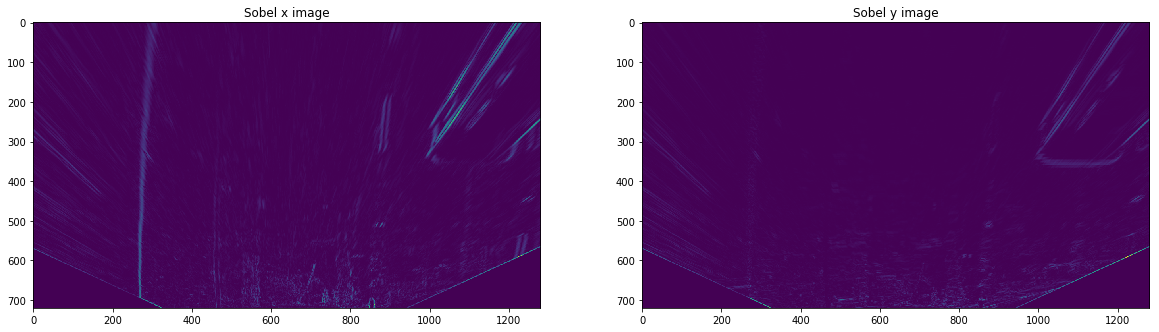

In [39]:
#Grayscaling
gray = cv2.cvtColor(warped_img, cv2.COLOR_RGB2GRAY)

#Calculate the derivative in the x coordinate   
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)

#Calculate the derivative in the y coordinate
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

#absolute value of the x derivative
abs_sobelx = np.absolute(sobelx)

#absolute value of the x derivative
abs_sobely = np.absolute(sobely)

#convert the absolute value image to 8-bit
scaled_sobel_x = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

#convert the absolute value image to 8-bit
scaled_sobel_y = np.uint8(255*abs_sobely/np.max(abs_sobely))

f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.set_title('Sobel x image')
ax1.imshow(scaled_sobel_x)
ax2.set_title('Sobel y image')
ax2.imshow(scaled_sobel_y)

for img_file in images:   
    mpimg.imsave('../output_images/Sobel_x.jpg', scaled_sobel_x)
    mpimg.imsave('../output_images/Sobel_y.jpg', scaled_sobel_y)

## Sobel Threshold 

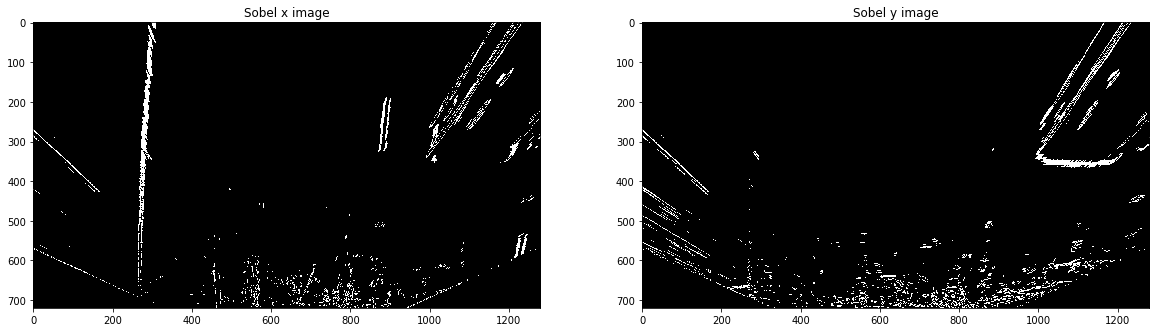

In [40]:
threshx_min = 20
threshx_max = 50
sxbinary = np.zeros_like(scaled_sobel_x)
sxbinary[(scaled_sobel_x > threshx_min) & (scaled_sobel_x <= threshx_max)] = 1


threshy_min = 10
threshy_max = 30
sybinary = np.zeros_like(scaled_sobel_y)
sybinary[(scaled_sobel_y > threshy_min) & (scaled_sobel_y <= threshy_max)] = 1



f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))


ax1.set_title('Sobel x image')
ax1.imshow(sxbinary, cmap='gray')
ax2.set_title('Sobel y image')
ax2.imshow(sybinary, cmap='gray')

for img_file in images:   
    mpimg.imsave('../output_images/Sobel_x_binary.jpg', sxbinary, cmap = cm.gray)
    mpimg.imsave('../output_images/Sobel_y_binary.jpg', sybinary, cmap = cm.gray)


# Lab 

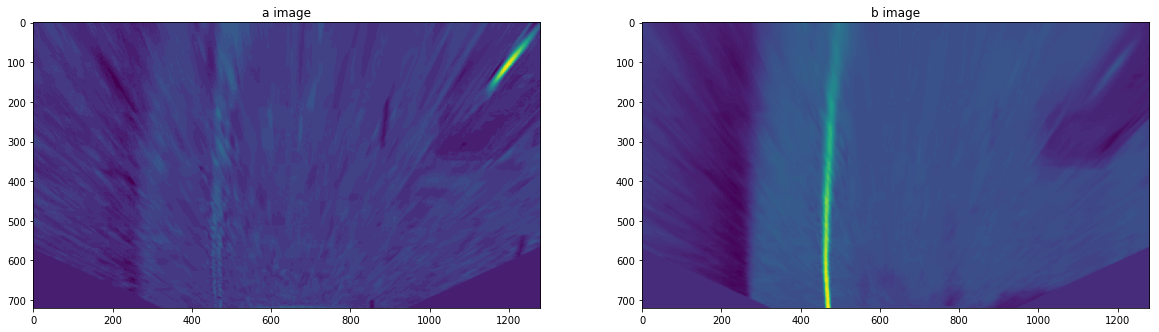

In [41]:
Lab = cv2.cvtColor(warped_img, cv2.COLOR_RGB2Lab)

Lab = cv2.GaussianBlur(Lab,(7,7),0)

L = Lab[:,:,0]
a = Lab[:,:,1]
b = Lab[:,:,2]


f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.set_title('a image')
ax1.imshow(a)
ax2.set_title('b image')
ax2.imshow(b)

for img_file in images:    
    mpimg.imsave('../output_images/a.jpg', a)
    mpimg.imsave('../output_images/b.jpg', b)
    


# Lab Threshold

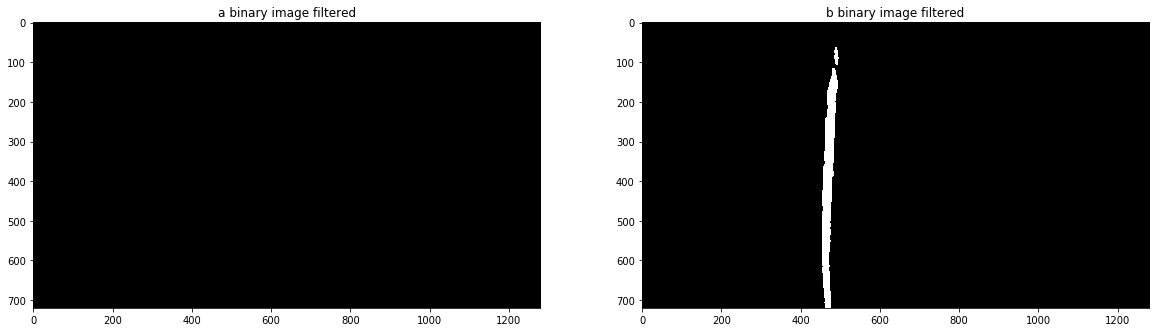

In [43]:
thresh_a = (90, 185)
a = a*(255/np.max(a))
binary_a = np.zeros_like(a)
binary_a[(a > thresh_a[0]) & (a <= thresh_a[1])] = 1

thresh_b = (190, 255)
b = b*(255/np.max(b))
binary_b = np.zeros_like(b)
binary_b[(b > thresh_b[0]) & (b <= thresh_b[1])] = 1


f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))


ax1.imshow(binary_a, cmap='gray')
ax1.set_title('a binary image filtered')


ax2.imshow(binary_b, cmap='gray')
ax2.set_title('b binary image filtered')

for img_file in images:   
    mpimg.imsave('../output_images/a_binary.jpg', binary_a, cmap = cm.gray)
    mpimg.imsave('../output_images/b_binary.jpg', binary_b, cmap = cm.gray)

# Define Image Pipeline 

## Useful functions

I decided to use just the color trasform methods than the sobel or gradient ones.

In [11]:
def HLS_Converter(img, tresh_low, tresh_hi, component):  
   

    img = cv2.GaussianBlur(img,(5,5),0)

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    
    L[0 : 720, 1100: 1280] = 0

    if component == 1:
        
        thresh_L = (tresh_low, tresh_hi)
        L = L*(255/np.max(L))
        binary_L = np.zeros_like(L)
        binary_L[(L > thresh_L[0]) & (L <= thresh_L[1])] = 1
        
        binary_output = binary_L
        
    elif component == 2:
        
        thresh_S = (tresh_low, tresh_hi)
        S = S*(255/np.max(S))
        binary_S = np.zeros_like(S)
        binary_S[(S > thresh_S[0]) & (S <= thresh_S[1])] = 1
        
        binary_output = binary_S
    
    return binary_output


def HSV_Converter(img, tresh_low, tresh_hi, component):  
       
    img = cv2.GaussianBlur(img,(5,5),0)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    H = hsv[:,:,0]
    S = hsv[:,:,1]
    V = hsv[:,:,2]
    
    V[0 : 720, 0: 400] = 0

    V[0 : 720, 1200: 1280] = 0
    
    if component == 1:
    
        thresh_S = (tresh_low, tresh_hi)
        S = S*(255/np.max(S))
        binary_S = np.zeros_like(S)
        binary_S[(S > thresh_S[0]) & (S <= thresh_S[1])] = 1
        
        binary_output = binary_S
    
    elif component == 2:

        thresh_V = (tresh_low, tresh_hi)
        V = V*(255/np.max(V))
        binary_V = np.zeros_like(V)
        binary_V[(V > thresh_V[0]) & (V <= thresh_V[1])] = 1
        
        binary_output = binary_V
    
    return binary_output
 

## My Pipeline

In [12]:

def my_pipeline(img):
    
    #Produces an undistorted image
    undistorted = cal_undistort(img, objpoints, imgpoints)
    
    #Produces a warped image
    warped_img, M, Minv = warp(undistorted, src, dst)
    
    #Select L component
    L_image = HLS_Converter(warped_img,210,255,1)
    
    #Select V component
    V_image = HSV_Converter(warped_img,225,255,2)
    
    #Combine L component and V component    
    mixed = np.zeros_like(L_image)
    mixed[(L_image == 1) | (V_image == 1)] = 1
        
    return mixed, Minv
    

## Testing pipeline on sample images

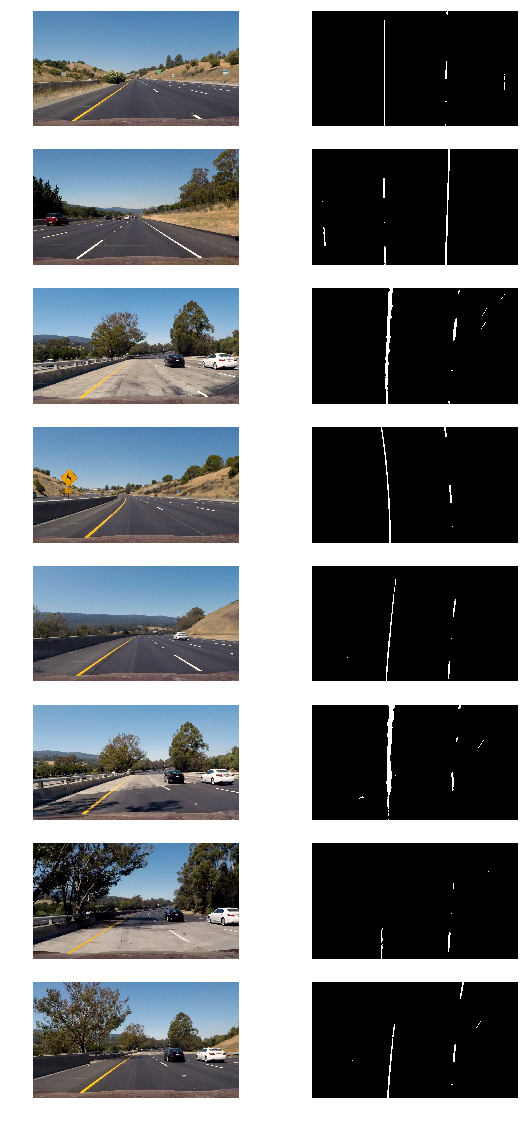

In [13]:
images = glob.glob('../test_images/*.jpg')

# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
                  
i = 0
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_bin, Minv = my_pipeline(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1
    
    mpimg.imsave('../output_images/'+str(i)+'.jpg', img_bin, cmap = cm.gray)


## Finding lines from bird's eye prospective

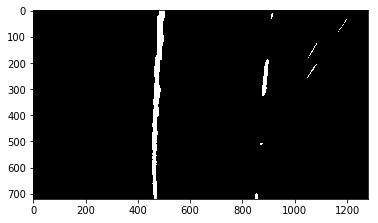

In [14]:
eye_bird_image = mpimg.imread('../test_images/test1.jpg')


img = cv2.cvtColor(eye_bird_image, cv2.COLOR_BGR2RGB)
bird_test_image, Minv = my_pipeline(img)


plt.imshow(bird_test_image, cmap='gray')


In [15]:
# Define the function that finds which "hot" pixels are associated with the lane lines

def sliding_window_and_polyfit(img):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    quarter_point = np.int(midpoint//2)
    # Previously the left/right base was the max of the left/right half of the histogram
    # this changes it so that only a quarter of the histogram (directly to the left/right) is considered
    leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
    rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint
    
       # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 35
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualization_data = (rectangle_data, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data


Rectangles


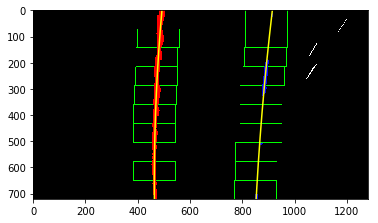

In [16]:
left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = sliding_window_and_polyfit(bird_test_image)

h = bird_test_image.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
#print('fit x-intercepts:', left_fit_x_int, right_fit_x_int)

rectangles = visualization_data[0]
histogram = visualization_data[1]

# Create an output image to draw on and visualize the result
out_img = np.uint8(np.dstack((bird_test_image, bird_test_image, bird_test_image))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, bird_test_image.shape[0]-1, bird_test_image.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
for rect in rectangles:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
# Identify the x and y positions of all nonzero pixels in the image
nonzero = bird_test_image.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
print('Rectangles')


for img_file in images:   
    mpimg.imsave('../output_images/Fit1.jpg', out_img)
    

Histogram


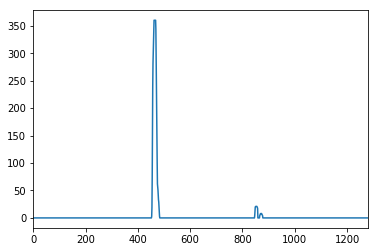

In [17]:
plt.plot(histogram)
plt.xlim(0, 1280)
print('Histogram')


## Find lines starting from previous frame

In [18]:
def polyfit_using_prev_fit(binary_warped, left_fit_prev, right_fit_prev):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] - margin)) & 
                      (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] - margin)) & 
                       (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    if len(leftx) != 0:
        # Fit a second order polynomial to each
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds


Next frame


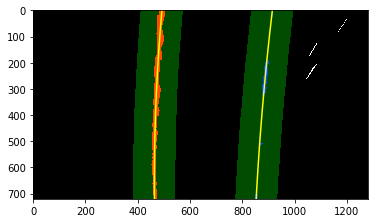

In [19]:
next_eye_bird = mpimg.imread('../test_images/test1.jpg')
next_eye_bird = cv2.cvtColor(next_eye_bird, cv2.COLOR_BGR2RGB)
bird_test_image_2, Minv = my_pipeline(next_eye_bird)   
margin = 80

left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = polyfit_using_prev_fit(bird_test_image_2, left_fit, right_fit)

# Generate x and y values for plotting
ploty = np.linspace(0, bird_test_image_2.shape[0]-1, bird_test_image_2.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

# Create an image to draw on and an image to show the selection window
out_img = np.uint8(np.dstack((bird_test_image_2, bird_test_image_2, bird_test_image_2))*255)
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
nonzero = bird_test_image_2.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds2], nonzerox[left_lane_inds2]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds2], nonzerox[right_lane_inds2]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area 
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx2, ploty, color='yellow')
plt.plot(right_fitx2, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
print('Next frame')

for img_file in images:   
    mpimg.imsave('../output_images/Fit2.jpg', result)


### Radius of curvature

In [20]:
def calc_curv_rad_and_center_dist(bin_img, l_fit, r_fit, l_lane_inds, r_lane_inds):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/378 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, bottom of the image
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    return left_curverad, right_curverad, center_dist



In [21]:
rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(bird_test_image, left_fit, right_fit, left_lane_inds, right_lane_inds)

print('Radius of curvature:', rad_l, 'm,', rad_r, 'm')
print('Distance from center:', d_center, 'm')


Radius of curvature: 700.519343825 m, 1045.83844481 m
Distance from center: -0.180257598726 m


### Drawing lanes on the original picture

In [22]:
def draw_lanes(img, binary_img, l_fit, r_fit, Minv):
    new_img = np.copy(img)
    if l_fit is None or r_fit is None:
        return img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    return result


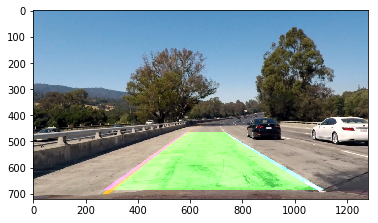

In [26]:
processed_image = draw_lanes(undistorted, bird_test_image, left_fit, right_fit, Minv)
plt.imshow(processed_image)

for img_file in images:   
    mpimg.imsave('../output_images/result.jpg', processed_image)


### Drawing lane on original picture with a couple of more information 

In [27]:
def draw_additional_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' from center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img


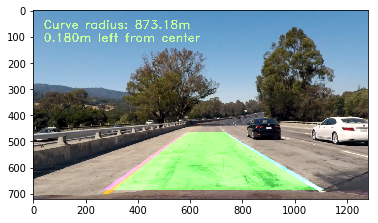

In [28]:
processed_image = draw_additional_data(processed_image, (rad_l+rad_r)/2, d_center)
plt.imshow(processed_image)

for img_file in images:   
    mpimg.imsave('../output_images/result2.jpg', processed_image)


### Define line class

In [29]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:                
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 20:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-20:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)


### Final Pipeline for processing image

In [30]:
def process_image(img):
    new_img = np.copy(img)
    img_bin, Minv = my_pipeline(new_img)
    
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, _ = sliding_window_and_polyfit(img_bin)
    else:
        l_fit, r_fit, l_lane_inds, r_lane_inds = polyfit_using_prev_fit(img_bin, l_line.best_fit, r_line.best_fit)
        
    # invalidate both fits if the difference is too high
    if l_fit is not None and r_fit is not None:
        # calculate x-intercept (bottom of image, x=image_height) for fits
        h = img.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        if abs(300 - x_int_diff) > 100:
            l_fit = None
            r_fit = None
            
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)
    
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        img_out1 = draw_lanes(new_img, img_bin, l_line.best_fit, r_line.best_fit, Minv)
        rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(img_bin, l_line.best_fit, r_line.best_fit, 
                                                               l_lane_inds, r_lane_inds)
        img_out = draw_additional_data(img_out1, (rad_l+rad_r)/2, d_center)
    else:
        img_out = new_img
    
    diagnostic_output = False
    if diagnostic_output:
        # put together multi-view output
        diag_img = np.zeros((720,1280,3), dtype=np.uint8)
        
        # original output (top left)
        diag_img[0:360,0:640,:] = cv2.resize(img_out,(640,360))
        
        # binary overhead view (top right)
        img_bin = np.dstack((img_bin*255, img_bin*255, img_bin*255))
        resized_img_bin = cv2.resize(img_bin,(640,360))
        diag_img[0:360,640:1280, :] = resized_img_bin
        
        # overhead with all fits added (bottom right)
        img_bin_fit = np.copy(img_bin)
        for i, fit in enumerate(l_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (20*i+100,0,20*i+100))
        for i, fit in enumerate(r_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (0,20*i+100,20*i+100))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, l_line.best_fit, (255,255,0))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, r_line.best_fit, (255,255,0))
        diag_img[360:720,640:1280,:] = cv2.resize(img_bin_fit,(640,360))
        
        # diagnostic data (bottom left)
        color_ok = (200,255,155)
        color_bad = (255,155,155)
        font = cv2.FONT_HERSHEY_DUPLEX
        if l_fit is not None:
            text = 'This fit L: ' + ' {:0.6f}'.format(l_fit[0]) + \
                                    ' {:0.6f}'.format(l_fit[1]) + \
                                    ' {:0.6f}'.format(l_fit[2])
        else:
            text = 'This fit L: None'
        cv2.putText(diag_img, text, (40,380), font, .5, color_ok, 1, cv2.LINE_AA)
        if r_fit is not None:
            text = 'This fit R: ' + ' {:0.6f}'.format(r_fit[0]) + \
                                    ' {:0.6f}'.format(r_fit[1]) + \
                                    ' {:0.6f}'.format(r_fit[2])
        else:
            text = 'This fit R: None'
        cv2.putText(diag_img, text, (40,400), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit L: ' + ' {:0.6f}'.format(l_line.best_fit[0]) + \
                                ' {:0.6f}'.format(l_line.best_fit[1]) + \
                                ' {:0.6f}'.format(l_line.best_fit[2])
        cv2.putText(diag_img, text, (40,440), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit R: ' + ' {:0.6f}'.format(r_line.best_fit[0]) + \
                                ' {:0.6f}'.format(r_line.best_fit[1]) + \
                                ' {:0.6f}'.format(r_line.best_fit[2])
        cv2.putText(diag_img, text, (40,460), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Diffs L: ' + ' {:0.6f}'.format(l_line.diffs[0]) + \
                             ' {:0.6f}'.format(l_line.diffs[1]) + \
                             ' {:0.6f}'.format(l_line.diffs[2])
        if l_line.diffs[0] > 0.001 or \
           l_line.diffs[1] > 1.0 or \
           l_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,500), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Diffs R: ' + ' {:0.6f}'.format(r_line.diffs[0]) + \
                             ' {:0.6f}'.format(r_line.diffs[1]) + \
                             ' {:0.6f}'.format(r_line.diffs[2])
        if r_line.diffs[0] > 0.001 or \
           r_line.diffs[1] > 1.0 or \
           r_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,520), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Good fit count L:' + str(len(l_line.current_fit))
        cv2.putText(diag_img, text, (40,560), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Good fit count R:' + str(len(r_line.current_fit))
        cv2.putText(diag_img, text, (40,580), font, .5, color_ok, 1, cv2.LINE_AA)
        
        img_out = diag_img
    return img_out


In [31]:
def plot_fit_onto_img(img, fit, plot_color):
    if fit is None:
        return img
    new_img = np.copy(img)
    h = new_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    plotx = fit[0]*ploty**2 + fit[1]*ploty + fit[2]
    pts = np.array([np.transpose(np.vstack([plotx, ploty]))])
    cv2.polylines(new_img, np.int32([pts]), isClosed=False, color=plot_color, thickness=8)
    return new_img


### Test on Videos
#### Project Video

In [32]:
# Import everything needed to edit/save/watch video clips
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# Define classes for left and right lanes



l_line = Line()
r_line = Line()

video_output1 = '../test_videos_outputs/project_video_output.mp4'
video_input1 = VideoFileClip('../project_video.mp4')
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)



[MoviePy] >>>> Building video ../test_videos_outputs/project_video_output.mp4
[MoviePy] Writing video ../test_videos_outputs/project_video_output.mp4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1260/1261 [1:13:41<00:03,  3.51s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../test_videos_outputs/project_video_output.mp4 

Wall time: 1h 13min 43s


#### Challenge Video

In [33]:
# Define classes for left and right lanes

l_line = Line()
r_line = Line()

video_output2 = '../test_videos_outputs/challenge_video_output.mp4'
video_input2 = VideoFileClip('../challenge_video.mp4')
processed_video = video_input2.fl_image(process_image)
%time processed_video.write_videofile(video_output2, audio=False)


[MoviePy] >>>> Building video ../test_videos_outputs/challenge_video_output.mp4
[MoviePy] Writing video ../test_videos_outputs/challenge_video_output.mp4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 485/485 [28:21<00:00,  3.51s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../test_videos_outputs/challenge_video_output.mp4 

Wall time: 28min 24s


In [34]:
l_line = Line()
r_line = Line()

video_output3 = '../test_videos_outputs/harder_challenge_video_output.mp4'
video_input3 = VideoFileClip('../harder_challenge_video.mp4')
processed_video = video_input3.fl_image(process_image)
%time processed_video.write_videofile(video_output3, audio=False)

[MoviePy] >>>> Building video ../test_videos_outputs/harder_challenge_video_output.mp4
[MoviePy] Writing video ../test_videos_outputs/harder_challenge_video_output.mp4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1199/1200 [1:12:32<00:03,  3.59s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../test_videos_outputs/harder_challenge_video_output.mp4 

Wall time: 1h 12min 36s
